In [1]:
import matplotlib
%matplotlib tk
%autosave 180
%load_ext autoreload
%autoreload 2

import nest_asyncio
%config Completer.use_jedi = False

#
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 
import numpy as np
import os
import scipy

# add root directory to be able to import packages
# todo: make all packages installable so they can be called/imported by environment
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from utils.calcium import calcium

from utils2 import VisualizeCorrelations

Autosaving every 180 seconds


<ipython-input-1-2e45c8c5d139>:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


/home/cat/.conda/envs/donato/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
###########################################################
################## VISUALIZE CORRELATION ARRAY ############
###########################################################
#
#root_dir = '/media/cat/4TB/donato/'
root_dir = '/run/user/1000/gvfs/smb-share:server=toucan-all.scicore.unibas.ch,share=donafl00-calcium$/Users/Rodrigo/2021/'
#animal_id = 'DON-002865'
animal_id = 'DON-006084'
#animal_id = 'DON-006085'
#animal_id = 'DON-006087'
#animal_id = 'DON-003165'
#animal_id = 'DON-003343'

#session = 'DON-002865_20210210'
session = '20210523'
#session = '20210601'
#session = 'DON-003343_20210220'

#
vc = VisualizeCorrelations(root_dir, animal_id, session)
vc.pval_threshold = 0.05
vc.pearson_threshold = 0.3

# use zscoring to extract networks
vc.zscore = True
vc.zscore_threshold = 5

# select which behavior state to load 
vc.subselect_moving_only = False
vc.subselect_quiescent_only = False

#
vc.shuffle = False

# select which correlation type to load; dynamic: uses z-scored data; static: uses raw pearson correlation with a threshold
#vc.dynamic_corr_flag = True

#
vc.load_corrs()

#
print ("correlation array: ", vc.corrs.shape)

# of non-nan values:  10253 , as percent of total:  0.03880830898272495
correlation array:  (514, 514)


In [4]:
###########################################################
############# VISUALIZE HISTOGRAM OF CORR VALS ############
###########################################################

vc.show_histogram()


In [5]:
###########################################################
################## VISUALIZE NETWORKS #####################
###########################################################
#
#vc.threshold = 0.3

#
vc.plot_graph_degree()


In [6]:
###########################################################
################## VISUALIZE NETWORKS #####################
###########################################################

# plot the network using the corr array using networkx module
import networkx as nx

#
vc.subsample = 3310
vc.remove_isolates = False
vc.threshold = 0.3

#
vc.plot_network()

Number of nodes: 489
Number of edges: 5109
Number of nodes: 489
Number of edges: 5109
Number of single isolates: 0
Graph density (manual): 0.04281906869154179


In [23]:
upphase = np.load(os.path.split(fname)[0]+'/binarized_traces.npz',
                  allow_pickle=True)['F_upphase']

# delete idx_del from upphase
upphase = np.delete(upphase, idx_del, axis=0)
print ("upphase: ", upphase.shape)

print (corrs.shape)
#print (corrs[0])

cell_id = 1

threshold = 0.3
#idx = np.where(corrs[cell_id]>threshold)[0]

# order the corrs by value
best_cells = np.argsort(corrs[cell_id])[::-1][:20]

#
n_plots = 10
fps = 30
window = 30

# plot the cell Id and all the other cells that are correlated with it
plt.figure()
t = np.arange(upphase.shape[1])/fps
# select 10 random ids from the size of corrs
cell_ids = np.random.randint(0,corrs.shape[0],n_plots)

# choose randomly 10 cells from best_cells
cell_ids = np.random.choice(best_cells, n_plots, replace=False)

ctr=0
for k in cell_ids:
    ax=plt.subplot(n_plots,1,ctr+1)
    
    upphase_cell = upphase[cell_id].copy()
    upphase_selected = upphase[k].copy()

    plt.plot(t,upphase_selected,c='blue')
    plt.plot(t,upphase_cell/2,c='black')
  
    # plot the correlation value as y label
    plt.ylabel("#" +str(k)+'\n'+
                "pcorr: "+str(np.round(corrs[cell_id][k],2))+', '
               #+str(np.round(corr_re[0],2))
               #+"\n"+str(np.round(corr_deleted[0],2))
               , fontsize=10)
    if ctr<9:
        plt.xticks([])
    #
    plt.yticks([])

    #
    ctr+=1

    #
    plt.xlim(t[0],t[-1])
#
plt.suptitle("Cell id "+str(cell_id), fontsize=20)
plt.xlabel("Time (sec)")
plt.show()

print (corrs)


upphase:  (399, 55740)
(299, 299)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
#
d = np.load('/media/cat/4TB/donato/DON-009192/20220319/002P-F/tif/suite2p/plane0/binarized_traces.npz', allow_pickle=True)

#
F_filtered = d['F_filtered']
print (F_filtered.shape)

#
plt.figure()
t = np.arange(F_filtered[0].shape[0])/30./60.
for k in range(20):
    plt.plot(t,F_filtered[k]+k*1)
    
   
plt.xlabel("Time (mins)")
plt.ylabel("Filtered [ca] time series")
plt.show()



(841, 134771)


(32, 32)


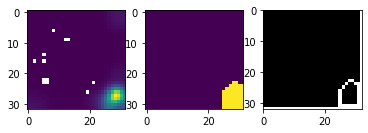

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

d = np.load('/media/cat/4TB/donato/nathalie/DON-007021/FS9/cell_analysis/36.npy', allow_pickle=True).item()

# D['cell_id'] = cell_id
# D["overlaps"] = overlaps
# D["spatial_info"] = spatial_infos
# D["spatial_info_zscores"] = spatial_info_zscores
# D["coherence"] = cohs
# D["fields_map_split"] = fields_map_split
# D["res_array"] = res_array
# D["rms_split"] = rms_split
# D['rms_all'] = rms_all
# D['fields_map_all'] = fields_map_all

#
rms_all = d['rms_all'][0]

#
fields_map_split = d['fields_map_split'][0]
print (fields_map_split.shape)
#

# plot this entry
plt.figure()
ax = plt.subplot(131)
plt.imshow(field)

ax=plt.subplot(132)
plt.imshow(fields_map_split)

# extract the contour of the fields_map_split image
ax=plt.subplot(133)


binary_image = (fields_map_split * 255).astype(np.uint8)

# find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# create an empty image to draw the contours
contour_image = np.zeros_like(binary_image)

# draw the contours on the empty image
cv2.drawContours(contour_image, contours, -1, (255), 1)

# show the image
plt.imshow(contour_image, cmap='gray')


plt.xlim(0,32)
plt.ylim(32,0)
plt.show()